#  Get EWK and QCD cross section models

In [1]:
#  Required imports

print("Importing standard library")
import os, sys, time

print("Importing python data libraries")
import numpy as np
import matplotlib.pyplot as plt

print("Importing third party libraries")
import dill    as     pickle
from   iminuit import Minuit

print("Importing custom backends")
sys.path.append("/Users/Ste/PostDoc/git-with-DP/SM-sandbox/proj5.4-EFT-Density-Estimation")
from backends.data_preparation import DataTable


Importing standard library
Importing python data libraries
Importing third party libraries
Importing custom backends


In [2]:
#  Run config

cWtil_vals = [0, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4]

input_fname_QCD = "../Data/SM_QCD_2M_rivet_output.pickle"

input_fnames_EWK = {}
input_fnames_EWK [0   ] = "../Data/SM_EWK_1M_rivet_output.pickle"
input_fnames_EWK [-0.4] = "../Data/cWtil_m0p4_full_400k_rivet_output.pickle"
input_fnames_EWK [-0.3] = "../Data/cWtil_m0p3_full_400k_rivet_output.pickle"
input_fnames_EWK [-0.2] = "../Data/cWtil_m0p2_full_400k_rivet_output.pickle"
input_fnames_EWK [-0.1] = "../Data/cWtil_m0p1_full_400k_rivet_output.pickle"
input_fnames_EWK [ 0.1] = "../Data/cWtil_0p1_full_400k_rivet_output.pickle"
input_fnames_EWK [ 0.2] = "../Data/cWtil_0p2_full_400k_rivet_output.pickle"
input_fnames_EWK [ 0.3] = "../Data/cWtil_0p3_full_400k_rivet_output.pickle"
input_fnames_EWK [ 0.4] = "../Data/cWtil_0p4_full_400k_rivet_output.pickle"

output_fname = ".xsection_models.pickle"


In [3]:
#  Data config

observable_limits = {}
observable_limits ["m_ll"      ] = [75    , 105  ]
observable_limits ["pT_ll"     ] = [0     , 900  ]
observable_limits ["theta_ll"  ] = [0     , np.pi]
observable_limits ["rap_ll"    ] = [0     , 2.2  ]
observable_limits ["m_jj"      ] = [150   , 5000 ]
observable_limits ["pT_jj"     ] = [0     , 900  ]
observable_limits ["theta_jj"  ] = [0     , np.pi]
observable_limits ["rap_jj"    ] = [0     , 4.4  ]
observable_limits ["pT_j1"     ] = [40    , 1200 ]
observable_limits ["pT_j2"     ] = [35    , 1200 ]
observable_limits ["Dy_j_j"    ] = [0     , 8.8  ]
observable_limits ["Dphi_j_j"  ] = [-np.pi, np.pi]
observable_limits ["N_jets"    ] = [2     , 5    ]
observable_limits ["N_gap_jets"] = [0     , 2    ]

remove_observables = ["N_jets", "pT_ll", "rap_ll", "theta_ll", "pT_jj", "theta_jj", "rap_jj", "pT_j1", "pT_j2", "N_gap_jets"]

int_observables = ["N_jets", "N_gap_jets"]

observables_order = ["m_jj", "m_ll", "Dphi_j_j", "Dy_j_j"]

num_observables = len(observables_order)


In [4]:
#  Load and format the data
#

print(f"Creating QCD data table")
print(f" -- events from file {input_fname_QCD}")
data_table_QCD = DataTable(input_fname_QCD)
print(f" -- Table created with {data_table_QCD.get_num_events()} events")
for observable, limits in observable_limits.items() :
    print(f" -- filtering observable {observable} between {limits[0]} and {limits[1]}")
    data_table_QCD.filter(observable, limits[0], limits[1])
    print(f" -- {data_table_QCD.get_num_events()} events survived")
for observable in remove_observables :
    print(f" -- removing observable {observable}")
    data_table_QCD.remove_column(observable)
print(" -- ordering observables")
data_table_QCD.reorder(*observables_order)
data_table_QCD.print_summary()

data_tables_EWK = {}
for cWtil in cWtil_vals :
    input_fname = input_fnames_EWK [cWtil]
    print(f"Creating EWK data table for cWtil={cWtil}")
    print(f" -- events from file {input_fname}")
    data = DataTable(input_fname)
    print(f" -- Table created with {data.get_num_events()} events")
    for observable, limits in observable_limits.items() :
        print(f" -- filtering observable {observable} between {limits[0]} and {limits[1]}")
        data.filter(observable, limits[0], limits[1])
        print(f" -- {data.get_num_events()} events survived")
    for observable in remove_observables :
        print(f" -- removing observable {observable}")
        data.remove_column(observable)
    print(" -- ordering observables")
    data.reorder(*observables_order)
    data.print_summary()
    data_tables_EWK [cWtil] = data
    

Creating QCD data table
 -- events from file ../Data/SM_QCD_2M_rivet_output.pickle
 -- Table created with 2000000 events
 -- filtering observable m_ll between 75 and 105
 -- 1269318 events survived
 -- filtering observable pT_ll between 0 and 900
 -- 1269300 events survived
 -- filtering observable theta_ll between 0 and 3.141592653589793
 -- 1269300 events survived
 -- filtering observable rap_ll between 0 and 2.2
 -- 1241601 events survived
 -- filtering observable m_jj between 150 and 5000
 -- 1206816 events survived
 -- filtering observable pT_jj between 0 and 900
 -- 1206816 events survived
 -- filtering observable theta_jj between 0 and 3.141592653589793
 -- 1206816 events survived
 -- filtering observable rap_jj between 0 and 4.4
 -- 1206816 events survived
 -- filtering observable pT_j1 between 40 and 1200
 -- 1206749 events survived
 -- filtering observable pT_j2 between 35 and 1200
 -- 1206181 events survived
 -- filtering observable Dy_j_j between 0 and 8.8
 -- 1206181 event

 -- 257469 events survived
 -- filtering observable N_gap_jets between 0 and 2
 -- 257469 events survived
 -- removing observable N_jets
 -- removing observable pT_ll
 -- removing observable rap_ll
 -- removing observable theta_ll
 -- removing observable pT_jj
 -- removing observable theta_jj
 -- removing observable rap_jj
 -- removing observable pT_j1
 -- removing observable pT_j2
 -- removing observable N_gap_jets
 -- ordering observables
* Registered the following keys:
    +-------------------------------------+
    | Column | Name     | Type            |
    +-------------------------------------+
    | 0      | m_jj     | <class 'float'> |
    | 1      | m_ll     | <class 'float'> |
    | 2      | Dphi_j_j | <class 'float'> |
    | 3      | Dy_j_j   | <class 'float'> |
    +-------------------------------------+

* Registered the following weights:
    +-------------------------+
    | Name   | Sum of weights |
    +-------------------------+
    | weight | 2.3040         |
    +

 -- 264485 events survived
 -- filtering observable pT_ll between 0 and 900
 -- 264446 events survived
 -- filtering observable theta_ll between 0 and 3.141592653589793
 -- 264446 events survived
 -- filtering observable rap_ll between 0 and 2.2
 -- 261009 events survived
 -- filtering observable m_jj between 150 and 5000
 -- 257356 events survived
 -- filtering observable pT_jj between 0 and 900
 -- 257356 events survived
 -- filtering observable theta_jj between 0 and 3.141592653589793
 -- 257356 events survived
 -- filtering observable rap_jj between 0 and 4.4
 -- 257356 events survived
 -- filtering observable pT_j1 between 40 and 1200
 -- 257308 events survived
 -- filtering observable pT_j2 between 35 and 1200
 -- 257127 events survived
 -- filtering observable Dy_j_j between 0 and 8.8
 -- 257127 events survived
 -- filtering observable Dphi_j_j between -3.141592653589793 and 3.141592653589793
 -- 257127 events survived
 -- filtering observable N_jets between 2 and 5
 -- 257127 e

---

### Get QCD cross section

-  independent of c
-  just get this by summing the weights of the data table
-  create a function to return this cross section, which will be saved

---

In [5]:

#  -  Calculate xsection
#
QCD_weights           = data_table_QCD.get_weights() * data_table_QCD.xsec_per_event
QCD_cross_section     = np.sum(QCD_weights)
QCD_cross_section_err = np.sqrt(np.sum(QCD_weights*QCD_weights))

#  -  Define functions to save which return this xsection
#
def get_QCD_cross_section (c=None) :
    return QCD_cross_section

def get_QCD_cross_section_and_uncertainty (c=None) :
    return (QCD_cross_section, QCD_cross_section_err)
 
#  -  Print what we found
#
print(f"QCD cross section is {QCD_cross_section:.4f} +/- {QCD_cross_section_err:.4f} pb")


QCD cross section is 13.8282 +/- 0.0127 pb


---

### Get EWK cross section

-  function of c
-  scan cWtil and sum the weights to get candidate cross sections
-  fit this with $f(c) ~=~ A ~+~ B\cdot c ~+~ C\cdot c^2$ to get a smooth parameterisation
-  create a function to return this cross section, which will be saved 

---

Fitting...
Fitting results are:
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  2.902E-1 |  0.002E-1 | -0.002E-1  |  0.002E-1  |         |         |       |
| 1 | B    | -0.023E-3 |  0.746E-3 | -0.746E-3  |  0.746E-3  |         |         |       |
| 2 | C    |  2.19E-2  |  0.30E-2  |  -0.30E-2  |   0.30E-2  |         |         |       |
------------------------------------------------------------------------------------------


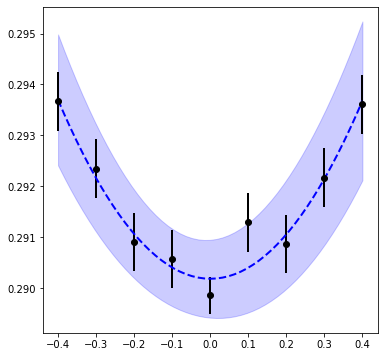

In [6]:

#  -  Get scan of xsections and save in fittable arrays
#
x, y, ey = [], [], []
for cWtil in sorted(cWtil_vals) :
    data_table_EWK              = data_tables_EWK[cWtil]
    cWtil_EWK_weights           = data_table_EWK.get_weights() * data_table_EWK.xsec_per_event
    cWtil_EWK_cross_section     = np.sum(cWtil_EWK_weights)
    cWtil_EWK_cross_section_err = np.sqrt(np.sum(cWtil_EWK_weights*cWtil_EWK_weights))
    x .append(cWtil)
    y .append(cWtil_EWK_cross_section)
    ey.append(cWtil_EWK_cross_section_err)
x, y, ey = np.array(x), np.array(y), np.array(ey)

    
#  -  Fit function is the chi2 (uncorrelated between bins)
# 
def chi2 (p) :
    A, B, C = p[0], p[1], p[2]
    pred    = A + B*x + C*x*x
    res     = (y - pred) / ey
    return np.sum(res*res)


#  -  Fit using Minuit
# 
print("Fitting...")
m = Minuit.from_array_func(chi2, start=[y[0], 0., 0.], error=[ey[0], 0.1, 0.1], name=["A", "B", "C"], errordef=1.)
m.migrad()
m.hesse()
m.minos()
print("Fitting results are:")
print(m.get_param_states())


#  -  Get fit results
# 
A_nominal, B_nominal, C_nominal = m.values["A"], m.values["B"], m.values["C"]
params_nominal                  = np.array([A_nominal, B_nominal, C_nominal])
fit_params_covariance = m.np_covariance()
eigenvalues, error_directions = np.linalg.eig(fit_params_covariance)
error_amplitudes = np.sqrt(eigenvalues)


#  -  Define functions to save which return the smoothed xsection
#
def get_EWK_cross_section (c) :
    return A_nominal + B_nominal*c + C_nominal*c*c

def get_EWK_cross_section_uncertainty (c) :
    EWK_cross_section          = get_EWK_cross_section(c)
    EWK_cross_section_variance = 0.
    for amp, vec in zip(error_amplitudes, error_directions) :
        A_shifted, B_shifted, C_shifted = params_nominal + amp*vec
        xsec_eigen_uncertainty          = (A_shifted + B_shifted*c + C_shifted*c*c) - EWK_cross_section
        EWK_cross_section_variance      = EWK_cross_section_variance + xsec_eigen_uncertainty*xsec_eigen_uncertainty
    return np.sqrt(EWK_cross_section_variance)

def get_EWK_cross_section_and_uncertainty (c) :
    return (get_EWK_cross_section(c), get_EWK_cross_section_uncertainty(c))


#  -  Plot what we did
#

fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.errorbar(x, y, yerr=ey, fmt="o", label="MG5 events", c="k", lw=2)

x_smooth  = np.linspace(x[0], x[-1], 51)
y_smooth  = get_EWK_cross_section (x_smooth)
ey_smooth = get_EWK_cross_section_uncertainty (x_smooth)
ax.plot(x_smooth, y_smooth, "--", c="blue", lw=2)
ax.fill_between(x_smooth, y_smooth-ey_smooth, y_smooth+ey_smooth, color="blue", alpha=0.2)

plt.show()


---

### Save functions to file

---

In [7]:
#  Save xsection functions to a file
#

to_save = {}
to_save ["get_QCD_cross_section"                ] = get_QCD_cross_section
to_save ["get_QCD_cross_section_and_uncertainty"] = get_QCD_cross_section_and_uncertainty
to_save ["get_EWK_cross_section"                ] = get_EWK_cross_section
to_save ["get_EWK_cross_section_uncertainty"    ] = get_EWK_cross_section_uncertainty
to_save ["get_EWK_cross_section_and_uncertainty"] = get_EWK_cross_section_and_uncertainty
to_save ["QCD_cross_section"                    ] = QCD_cross_section
to_save ["QCD_cross_section_err"                ] = QCD_cross_section_err
to_save ["EWK_paramA"                           ] = A_nominal
to_save ["EWK_paramB"                           ] = B_nominal
to_save ["EWK_paramC"                           ] = C_nominal
to_save ["EWK_param_covariance"                 ] = fit_params_covariance
pickle.dump(to_save, open(output_fname, "wb"))
